In [3]:
# Import libraries
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [4]:
places = defaultdict(list)

places['Upper East'] = ['Builsa South','Builsa North Municipal','Kasena Nankana Municipal',
                        'Kasena Nankana West','Bolgatanga Municipal','Talensi','Bolgatanga East',
                        'Bongo','Nabdam','Bawku West','Binduri','Bawku Municipal','Garu','Tempane','Pusiga']

In [5]:
literacy = {}

literacy['Upper East'] = {'Male not literate 6-11': 47.2, 'Female not literate 6-11': 56.3,
                         'Male not literate 11-15': 43.6, 'Female not literate 11-15': 55.2,
                         'Male not literate 15+': 44.6, 'Female not literate 15+': 58.5}
attendance = {}

attendance['Upper East'] = {'Male not attended 3-6': 31.8, 'Female not attended 3-6': 42.6,
                           'Male not attended '}


In [8]:
male_not_literate_dep = [47.2, 43.6, 44.6]
female_not_literate_dep = [56.3, 55.2, 58.5]

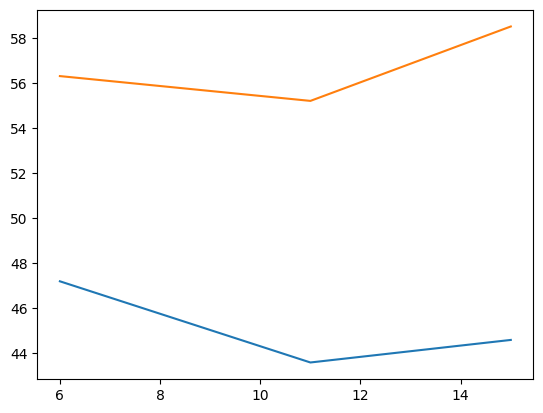

In [9]:
plt.plot([6, 11, 15], male_not_literate_dep)
plt.plot([6, 11, 15], female_not_literate_dep)
plt.show()